# Plot of an Accreting Supermassive Black Hole

Polar Dust drawn
BLR drawn
Accretion disk drawn
SMBH drawn
NLR drawn
Host galaxy drawn
X-ray corona drawn


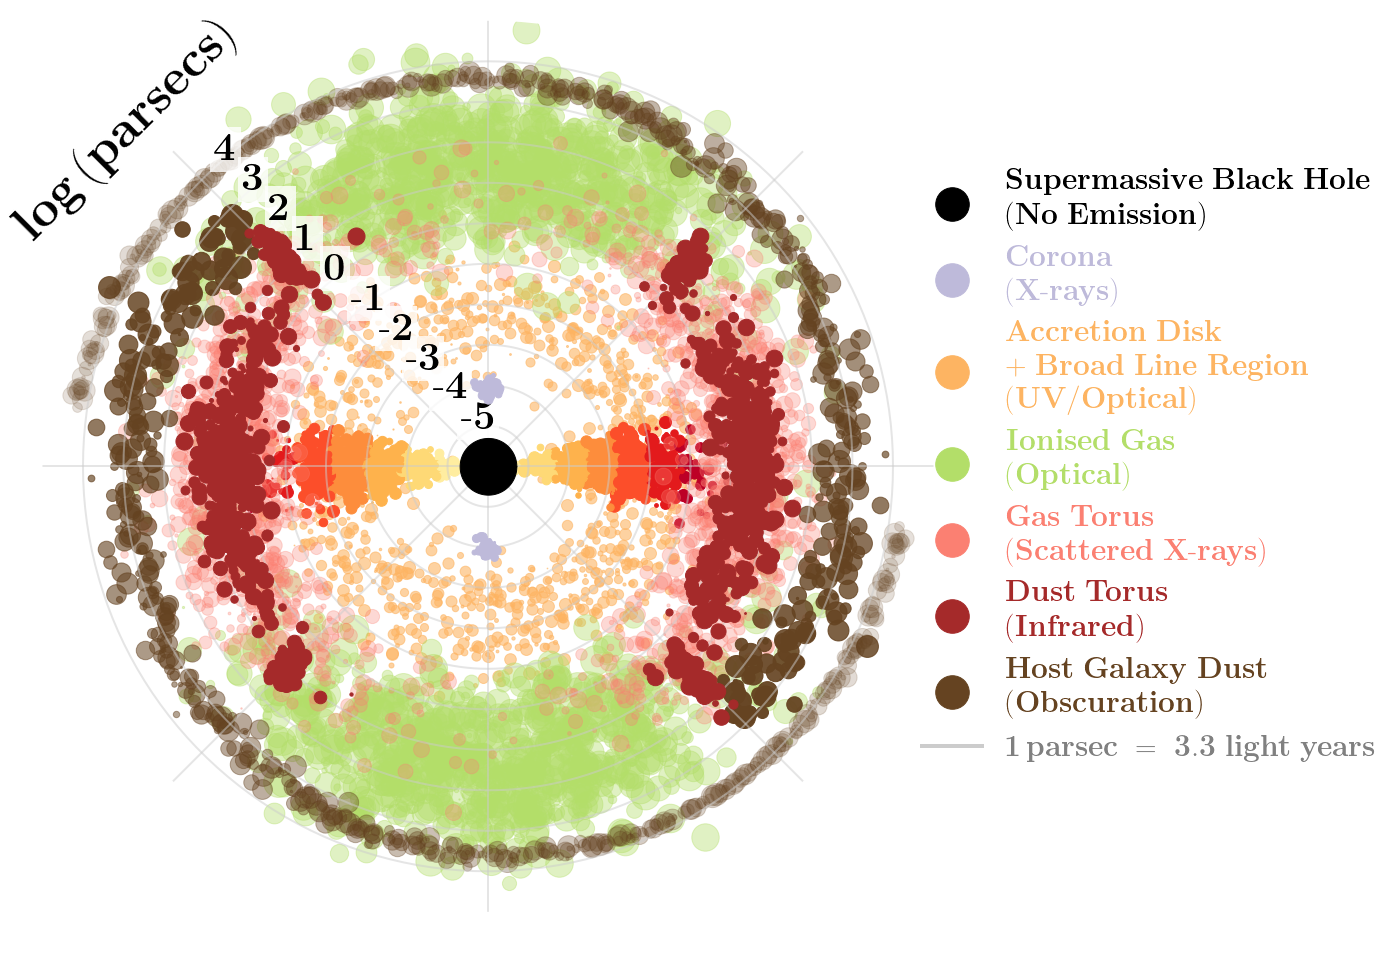

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import palettable.colorbrewer as pc
from cycler import cycler
%matplotlib inline
plt.rcParams["axes.prop_cycle"]=cycler('color',pc.qualitative.Set3_12.mpl_colors)


def plot_POLAR_blobs_gauss(r_mu,r_sig,t_mu,t_sig,N,COL,ALP,SIZE,axis,ZORD=-1.,tag="none"):
    new_thetas=np.random.normal(t_mu,t_sig,size=N)
    new_rs=np.random.normal(r_mu,r_sig,size=N)
    sizes=np.random.uniform(size=N)*SIZE

    for i,rval in enumerate(new_rs):
        if tag=="AD":COL=get_var_col(rval,np.min(new_rs),np.max(new_rs))
        ax.scatter(new_thetas[i],rval,s=sizes[i],color=COL,alpha=ALP,zorder=ZORD)

def get_var_col(val,val1,val2):
    bin_edges=np.linspace(val1,val2,9)
    cmap = cycler('color',pc.sequential.YlOrRd_9.mpl_colors)    
    idx=np.abs(bin_edges - val).argmin()
    colour=cmap.by_key()['color'][idx]
    return colour

fig=plt.figure(figsize=(20,15))
gs1=gridspec.GridSpec(1,2,width_ratios=[7,1])
ax=fig.add_subplot(gs1[0],projection="polar")
ax_key=fig.add_subplot(gs1[1])
fig.subplots_adjust(wspace=0.,hspace=0.)
ax_key.axis("off")

theta_tor=35.5*np.pi/180.
## log(r/pc) == -1. --> 2.
plot_POLAR_blobs_gauss(.5,.4,0.,theta_tor/2.,4*10**2,"brown",1,300,ax,10)
plot_POLAR_blobs_gauss(.5,.4,np.pi,theta_tor/2.,4*10**2,"brown",1,300,ax,10)

t1=np.linspace(np.pi+np.pi/4,np.pi-np.pi/4,100)
t2=np.linspace(2.*np.pi+np.pi/4,2.*np.pi-np.pi/4,100)

plot_POLAR_blobs_gauss(1.,.3,np.pi/4.,theta_tor/30,60,"brown",1,300,ax,10)
plot_POLAR_blobs_gauss(1.,.3,np.pi+np.pi/4.,theta_tor/30,60,"brown",1,300,ax,10)
plot_POLAR_blobs_gauss(1.2,.5,-np.pi/4.,theta_tor/30,60,"brown",1,300,ax,1)
plot_POLAR_blobs_gauss(1.2,.5,np.pi-np.pi/4.,theta_tor/30,60,"brown",1,300,ax,10)
print("Polar Dust drawn")



## log(r/pc) == -2. --> 1.5
plot_POLAR_blobs_gauss(0.5,0.8,0.,theta_tor/1.1,1*10**3,"C3",0.3,300,ax,0)
plot_POLAR_blobs_gauss(0.5,0.8,np.pi,theta_tor/1.1,1*10**3,"C3",0.3,300,ax,0)

plot_POLAR_blobs_gauss(-2.,0.8,0.,np.pi/1.5,5*10**2,"C5",0.6,150,ax,-1)
plot_POLAR_blobs_gauss(-2.,0.8,np.pi,np.pi/1.5,5*10**2,"C5",0.6,150,ax,-1)
print("BLR drawn")

plot_POLAR_blobs_gauss(-3.,1.,0.,theta_tor/6.,9*10**2,"C5",1,150,ax,-1,"AD")
plot_POLAR_blobs_gauss(-3.,1.,np.pi,theta_tor/6.,9*10**2,"C5",1,150,ax,-1,"AD")
print("Accretion disk drawn")


ax.fill_between(np.linspace(0.,2.*np.pi,100),-6.,-5.3,color="k",zorder=10**2)
print("SMBH drawn")


## Narrow Line Region (optical ionised gas)
theta=np.linspace(np.pi/2.+np.pi/4,np.pi/2.-np.pi/4,100)
plot_POLAR_blobs_gauss(1.6,1.,np.pi/2,np.pi/7,9*10**2,"C6",0.4,900,ax,-1)
plot_POLAR_blobs_gauss(1.6,1.,np.pi+np.pi/2,np.pi/7,9*10**2,"C6",0.4,900,ax,-1)
print("NLR drawn")


x=np.linspace(0,np.pi*1.2,500)
theta = x-np.pi/4.
r0 = 2.5*x/np.pi+1.5
r1 = .4*x/np.pi+3.5
alphas=np.logspace(0.,-0.8,len(x))
for i,rval in enumerate(r0):
    r_new=np.random.normal(0.5*(rval+r1[i]),0.25*np.fabs(rval-r1[i]),1)
    new_theta=np.random.normal(theta[i],np.fabs(theta[i]/100.),1)
    new_size=np.random.uniform(size=1)*500.
    ax.scatter(new_theta,r_new,s=new_size,color="#654321",zorder=0,alpha=alphas[i])
    ax.scatter(np.pi+new_theta,r_new,s=new_size,color="#654321",zorder=0,alpha=alphas[i])
print("Host galaxy drawn")

plot_POLAR_blobs_gauss(-4.,0.12,np.pi/2,np.pi/50,5*10**1,"C2",1.,100,ax,10)
plot_POLAR_blobs_gauss(-4.,0.12,-np.pi/2,np.pi/50,5*10**1,"C2",1.,100,ax,10)
print("X-ray corona drawn")


## Play with plot aesthetics here
ax.grid(linewidth=2,color="0.8",zorder=-10**8,alpha=.5)
ax.set_rlim(-6.,5.)
ax.set_rticks(np.arange(-6.,5.,1.))
rticklabs=[r"$.$",r"${\bf \mbox{-}5}$",r"${\bf \mbox{-}4}$",r"${\bf \mbox{-}3}$",r"${\bf \mbox{-}2}$",r"${\bf \mbox{-}1}$",r"${\bf 0}$",r"${\bf 1}$",r"${\bf 2}$",r"${\bf 3}$",r"${\bf 4}$"]
# rticklabs=[r"$.$",r"${\bf 10^{\mbox{-}5}}$",r"${\bf 10^{\mbox{-}4}}$",r"${\bf 10^{\mbox{-}3}}$",r"${\bf 10^{\mbox{-}2}}$",r"${\bf 10^{\mbox{-}1}}$",r"${\bf 1}$",r"${\bf 10}$",r"${\bf 10^{2}}$",r"${\bf 10^{3}}$",r"${\bf 10^{4}}$"]
# rticklabs=[r"$.$",r"${\bf 10^{\mbox{-}5}}$","",r"${\bf 10^{\mbox{-}3}}$","",r"${\bf 10^{\mbox{-}1}}$","",r"${\bf 10}$","",r"${\bf 10^{3}}$",""]
ax.set_yticklabels(rticklabs)
ax.tick_params(axis='y', colors='k')
fig.text(0.25,0.85,r"${\bf log\,(parsecs})$",fontsize=50.,zorder=10**50,rotation=45.,ha="center",va="center")
ax.set_xticklabels([])
pos=ax.get_rlabel_position()
ax.set_rlabel_position(pos+110)
ax.spines["polar"].set_visible(False)
ax.set_axisbelow(True)
ax.yaxis.set_label_coords(0.45,0.75)
for label in ax.yaxis.get_ticklabels():label.set_bbox(dict(facecolor='white', edgecolor='none',alpha=0.8,zorder=10**12))
ax.set_axisbelow(True)


## Plot key here
ax_key.scatter(-5.,-5.,s=500,facecolor="k",label=r"${\bf Supermassive\ Black\ Hole}$"+"\n"+r"${\bf (No\ Emission)}$")
ax_key.scatter(-5.,-5.,s=500,facecolor="C2",label=r"${\bf Corona}$"+"\n"+r"${\bf (X\mbox{-}rays)}$")
ax_key.scatter(-5.,-5.,s=500,facecolor="C5",label=r"${\bf Accretion\ Disk}$"+"\n"+r"${\bf \mbox{+}\ Broad\ Line\ Region}$"+"\n"+r"${\bf (UV/Optical)}$")
ax_key.scatter(-5.,-5.,s=500,facecolor="C6",label=r"${\bf Ionised\ Gas}$"+"\n"+r"${\bf (Optical)}$")
ax_key.scatter(-5.,-5.,s=500,facecolor="C3",label=r"${\bf Gas\ Torus}$"+"\n"+r"${\bf (Scattered\ X\mbox{-}rays)}$")
ax_key.scatter(-5.,-5.,s=500,facecolor="brown",label=r"${\bf Dust\ Torus}$"+"\n"+r"${\bf (Infrared)}$")
ax_key.scatter(-5.,-5.,s=500,facecolor="#654321",label=r"${\bf Host\ Galaxy\ Dust}$"+"\n"+r"${\bf (Obscuration)}$")
ax_key.plot([-5.,-5.],[-5.,-5.],lw=4.,alpha=1.,c="0.8",ls="-",label=r"${\bf 1\,parsec\ =\ 3.3\ light \ years}$")


handles,labels=plt.gca().get_legend_handles_labels()
order=[1,2,3,4,5,6,7,0]
leg=ax_key.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc="center",framealpha=0.,ncol=1,bbox_to_anchor=(1.1,0.5))
ax_key.set_ylim(0.,1.)
ax_key.set_xlim(0.,1.)

leg.get_texts()[0].set_color("k")
leg.get_texts()[1].set_color("C2")
leg.get_texts()[2].set_color("C5")
leg.get_texts()[3].set_color("C6")
leg.get_texts()[4].set_color("C3")
leg.get_texts()[5].set_color("brown")
leg.get_texts()[6].set_color("#654321")
leg.get_texts()[7].set_color("0.5")
leg.get_texts()[7].set_alpha(1.)




fig.savefig("./SMBH_blobs.png")